# **Browser benchmarking**

## Context

At the beginning of 2023 the youtube channel Diolinux released a video comparing the performances of 20 web browsers in five tests, each one evaluating one functional aspect of the browser. The channel also evaluated the RAM usage in two scenarios: when under workload (with 7 open tabs) and when the browser was idle. Each test was run three times for each browser and the final score, used in this notebook, was obtained from the arithmetic mean of the three rounds. The tests where performed at the very end of the year 2022, between dates of 20 and 22 of december

## The objective of this notebook

Based solely on browser performance provided by Diolinux, the objective of this notebook is to analyze and choose the best performing browser from these 20 browser options

## The data

The data obtained from Diolinux benchmarking (the parcials and final results) is contained in `./data/Diolinux Browsers Benchmarks - 2023.xlsx` excel worksheet. A copy, stored as `results.csv` and containing only the finals result, was made to easy the handling process

In [1]:
DATA = './data/'

In [15]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale
from scipy.stats import pearsonr, shapiro

# Custom made functions to analyze the data
# using Principal Components Analysis
# More on that at the following cells
from tools import bartletts_sphericity, PCA

In [3]:
results = pd.read_csv(DATA + 'results.csv', sep=';')
results

,browser,webbasemark,jetstream,motionmark,speedometer,html5,tab_ram,idle_ram
0,LibreWolf,1028.88,132.63,863.01,138.33,465.0,3111.35,3681.0
1,GNOME Web,654.54,213.09,452.73,201.00,448.0,2887.93,3661.0
2,Tor,0.00,0.00,450.78,0.00,416.0,1871.41,3640.0
3,Floorp,824.92,0.00,431.33,181.67,466.0,4066.63,3504.0
4,Chromium,1372.84,243.59,1040.69,232.27,526.0,5244.21,3357.0
5,Konqueror,1512.04,180.26,784.18,150.60,519.0,2488.30,3255.0
6,Falkon,1464.83,186.24,801.05,137.33,472.0,4886.64,3253.0
7,Firefox,1310.60,144.46,1022.16,194.67,464.0,3916.44,3241.0
8,Brave,1526.39,242.09,1026.79,229.00,521.0,4038.66,3238.0
9,Edge,1262.64,227.61,884.94,180.17,476.0,5865.22,3228.0


In [4]:
results.set_index('browser', inplace=True)
results

,webbasemark,jetstream,motionmark,speedometer,html5,tab_ram,idle_ram
browser,,,,,,,
LibreWolf,1028.88,132.63,863.01,138.33,465.0,3111.35,3681.0
GNOME Web,654.54,213.09,452.73,201.00,448.0,2887.93,3661.0
Tor,0.00,0.00,450.78,0.00,416.0,1871.41,3640.0
Floorp,824.92,0.00,431.33,181.67,466.0,4066.63,3504.0
Chromium,1372.84,243.59,1040.69,232.27,526.0,5244.21,3357.0
Konqueror,1512.04,180.26,784.18,150.60,519.0,2488.30,3255.0
Falkon,1464.83,186.24,801.05,137.33,472.0,4886.64,3253.0
Firefox,1310.60,144.46,1022.16,194.67,464.0,3916.44,3241.0
Brave,1526.39,242.09,1026.79,229.00,521.0,4038.66,3238.0


In [5]:
results.describe()

,webbasemark,jetstream,motionmark,speedometer,html5,tab_ram,idle_ram
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,1061.407000,162.033500,715.925500,156.824000,458.750000,3710.219500,3186.750000
std,464.256677,90.025895,270.197579,66.990217,113.329921,1712.367184,290.541939
min,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,2599.000000
25%,816.502500,132.597500,515.730000,142.410000,460.000000,2420.827500,2993.250000
50%,1258.805000,195.055000,792.615000,180.585000,471.500000,3977.550000,3215.500000
75%,1384.660000,227.745000,885.677500,191.167500,521.750000,5263.050000,3280.500000
max,1560.100000,244.430000,1040.690000,233.330000,528.000000,5942.880000,3681.000000


In [37]:
prompt = 'Shapiro-Wilk normality test'
prompt += ' (H0 = data was drawn from a normal distribution)'
print(prompt)
print('-' * len(prompt))
for feature in results.columns:
    x = results[feature]
    pvalue = "{:.5f}".format(shapiro(x).pvalue)

    prompt = f"§{feature} pvalue: {pvalue}"
    
    fill = ' ' * (30 - len(prompt))
    print(prompt.replace('§', fill))

Shapiro-Wilk normality test (H0 = data was drawn from a normal distribution)
----------------------------------------------------------------------------
  webbasemark pvalue: 0.00607
    jetstream pvalue: 0.00043
   motionmark pvalue: 0.04782
  speedometer pvalue: 0.00227
        html5 pvalue: 0.00000
      tab_ram pvalue: 0.25619
     idle_ram pvalue: 0.48827


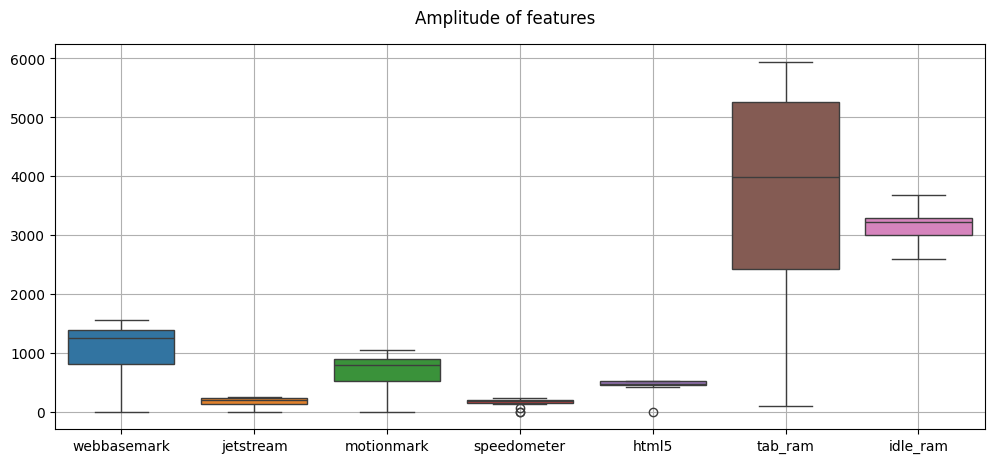

In [6]:
plt.figure(figsize=(12,5))

plt.suptitle('Amplitude of features', y = 0.95)
sns.boxplot(data=results)
plt.grid()

***As it notes we're dealing with different amplitudes and ranges. In order to analyze these features equally we may scale then***

In [7]:
results_scaled = scale(results)
results_scaled = pd.DataFrame(results_scaled, columns=results.columns, index=results.index)

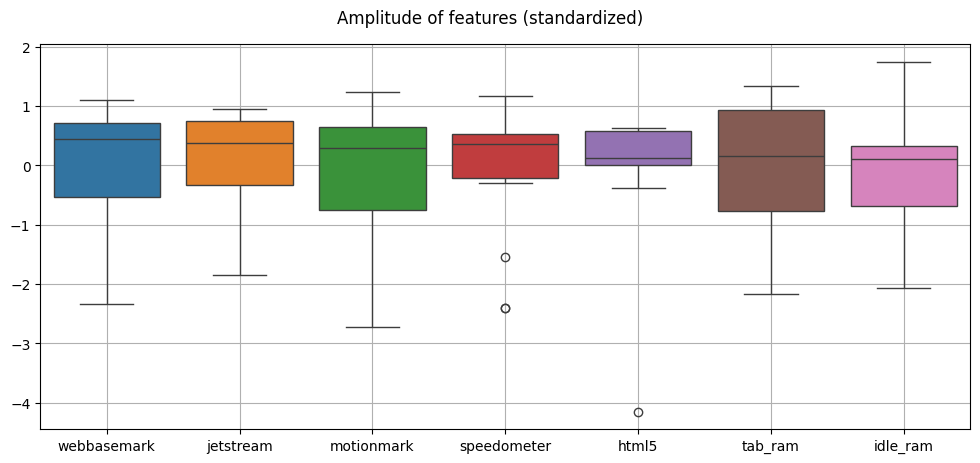

In [8]:
plt.figure(figsize=(12,5))

plt.suptitle('Amplitude of features (standardized)', y = 0.95)
sns.boxplot(data=results_scaled, palette='tab10')
plt.grid()

### The ***Principal Components Analysis (PCA)***

Is it an unsupervised/diagnostic techique used in order to extract latent linear combinations between features of a numerical dataset and reduce the dataset dimensionality. In other words, the PCA techique explores hidden relationships between features of a dataset - as in the (example) positive correlation between grades for maths and physics or the also psitive corralation between grades for english and literature - and summarize the correlated features into one or more factors

#### Every case is worth of PCA?

No. The PCA yields satisfactory results when dealing with datasets which its features presents a significant correlation between themselves. Therefore an important thing to be evaluated is the Bartlett's sphericity test and the dataset correlation matrix as shown below

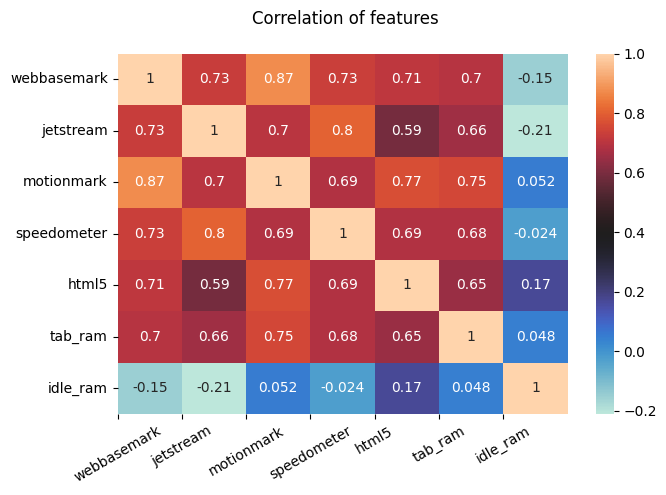

In [9]:
plt.figure(figsize=(7, 5))
plt.suptitle('Correlation of features')
sns.heatmap(results.corr(), annot=True, cmap='icefire')
plt.xticks(list(range(0, len(results.columns))),
           labels=list(results.columns), rotation=30)
plt.tight_layout()
plt.show()

Note that the `idle_ram` variable presents the lower correlation between itself and the other variables in the dataset. It may show that the performance of a browser in these other tests does not relates to its idle usage of RAM

In [29]:
prompt = 'Correlations test and pvalues'
prompt += ' (H0 = samples are uncorrelated)'
print(prompt)
print('-' * len(prompt))
for feature in results.columns:
    x = results['idle_ram'].values
    y = results[feature].values
    corr = pearsonr(x, y)

    r = "{:.5f}".format(corr.statistic)
    p = "{:.5f}".format(corr.pvalue)

    prompt = f"idle_ram  x  {feature}§"
    prompt += f"r: {' ' if float(r) > 0 else ''}{r}, pvalue: {p}"
    
    fill = ' ' * (60 - len(prompt))
    print(prompt.replace('§', fill))

Correlations test and pvalues (H0 = samples are uncorrelated)
-------------------------------------------------------------
idle_ram  x  webbasemark       r: -0.14999, pvalue: 0.52793
idle_ram  x  jetstream         r: -0.21081, pvalue: 0.37232
idle_ram  x  motionmark        r:  0.05221, pvalue: 0.82695
idle_ram  x  speedometer       r: -0.02399, pvalue: 0.92002
idle_ram  x  html5             r:  0.17058, pvalue: 0.47212
idle_ram  x  tab_ram           r:  0.04804, pvalue: 0.84060
idle_ram  x  idle_ram          r:  1.00000, pvalue: 0.00000


#### The Bartlett's sphericity test

In order to extract the linear combinations of the features from a dataset those features need to be correlated between themselves, *id est*, the correlations between features have to be different than zero. Thus the correlations matrix need to be different than the identity matrix. This sphericity test assert for this null hypothesis: the correlation matrix equals the identity matrix.

The test assume a $X^{2}$ distribution with $\frac{k \cdot (k - 1)}{2}$ degrees of freedom to which $X^{2}_{Bartlett}$ is calculated by: $$X^{2}_{Bartlett} = \ln{|D|} \cdot \left[\left(\frac{2 \cdot k + 5}{6}\right) - (n - 1)\right]$$

In [11]:
print(bartletts_sphericity(results))

Bartlett's chi squared test for sphericity
------------------------------------------
chi2: 91.84738, ddof: 21.0
pvalue: 0.0


#### The Principal ***`FUN`*** Analysis

After asserting the PCA is adequate we may proceed the calculations. The first step is to extract the linear combinations through the *`eigenvalues`* $\lambda^{2}$ and *`eigenvectors`* $v$ of the correlation matrix. The eigenvalues are a key component of the PCA for they represent the feature variance that each factor can summarize. They also are used to select how many and what factors are to be extracted by following the Kaiser criterion: the factors to be extracted are those which eigenvalues are greater than 1

The PCA objective is to calculate the $k$ factors for a dataset with $m$ variables. The factors are obtained by:
$$F_{nk} = x_{n1} \cdot s_{1k} + x_{n2} \cdot s_{2k} + \cdots + x_{nm} \cdot s_{mk} = \Sigma_{i=1}^{m} x_{ni} \cdot s_{ik}$$
or:
$$F_{n \times k} = X_{n \times m} \times S_{m \times k}$$
where $s_{mk}$ represents each feature $m$ `score` given by:
$$s_{mk} = \frac{v_{mk}}{\sqrt{\lambda^{2}_{k}}}$$
for each $k$ array of scores $S_{m \times k}$ in each linear combination. Also each $x_{nm}$ comes from the standardized dataset $X_{n \times m}$ thus:
$$F_{n \times k} = ZX_{n \times m} \times \frac{v_{mk}}{\sqrt{\lambda^{2}_{k}}}$$

Finally, in order to summarize the dataset features, it is extracted the ``factor loads``. They represent how each variable is related to each factor based of Pearson's correlation. These loadings are used in the ``loading plot``, a great visual media of assessing the relationships between variables. Also, for a matrix $L_{m \times k}$ of factor loads $l_{mk}$ representing the correlations of $m$ original variables to $k$ factors, a `communality` $c_{m}$ defined as:
$$c_{m} = \Sigma_{i=1}^{k} l^{2}_{mi}$$
represents the total variance shared of each feature $m$ between all factors. These communalities are a great way to asses the assrtivity in choosing the factors to represent the dataset in order to include or exclude a factor

In [12]:
pca_analysis = PCA(results)
pca_analysis.fit()
print('\n' + str(pca_analysis.communalities), end='\n')
pca_analysis.communalities.describe().T

Eigenvalues: [4.576819645396222, 1.1336839344902427, 0.4200364498358966, 0.35132775140179606, 0.25035723348542654, 0.180217013663422, 0.08755797172698955]
Extracting 2 factors based on Kaiser's criterion

             Communalities
webbasemark       0.843159
jetstream         0.799452
motionmark        0.845230
speedometer       0.768863
html5             0.774670
tab_ram           0.722183
idle_ram          0.956947


,count,mean,std,min,25%,50%,75%,max
Communalities,7.0,0.815786,0.075788,0.722183,0.771766,0.799452,0.844194,0.956947


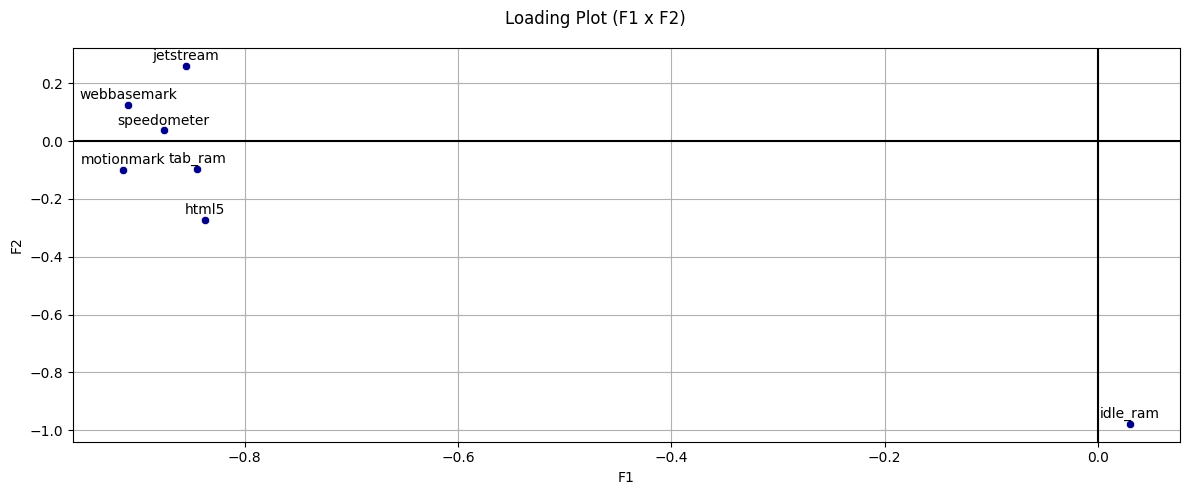

In [13]:
plt.figure(figsize=(12, 5))

plt.suptitle('Loading Plot (F1 x F2)')
sns.scatterplot(pca_analysis.factor_load, x=0, y=1, color='darkblue')
plt.axhline(label='F1', color='black')
plt.axvline(label='F2', color='black')
plt.xlabel('F1')
plt.ylabel('F2')
plt.grid()

for feature in pca_analysis.factor_load.index:
    x1, x2 = pca_analysis.factor_load.loc[feature, :]
    x2 += .02
    plt.text(x1, x2, feature, va='baseline', ha='center',
             wrap=True, clip_on=True, snap=True,)

plt.tight_layout()

The communalities show that all features are well factorized by only two factors. And the loading plot shows how the variables are related to each factor

Notice the distance between idle_ram and any other variable from the dataset, thus making the idle_ram the furthest feature from all other perfomance indicators. Any construct that seeks to relate those seven performance indicators may account to a non-linear relation for this factor

#### But how about the browsers?

The factors are linear combinations from the features of the dataset, so they contain the principal components of the variables while condensing them into a new dataset with uncorrelated features and less variables. But, still, maintaining the numerical relationships between each variable and each sample. Then having a $20 \times 7$ condensed into a $20 \times 2$ frame makes it possible to plot the browsers results into a bidimensional graphic

Based on this loading plot one can qualify the abscissa factor, $F1$, as representing the combination of `Tests Performance` results plus the `RAM usage` under workload and the ordinate factor, $F2$, as the `RAM idle usage`. So the browsers move along cartesian axis according to those results

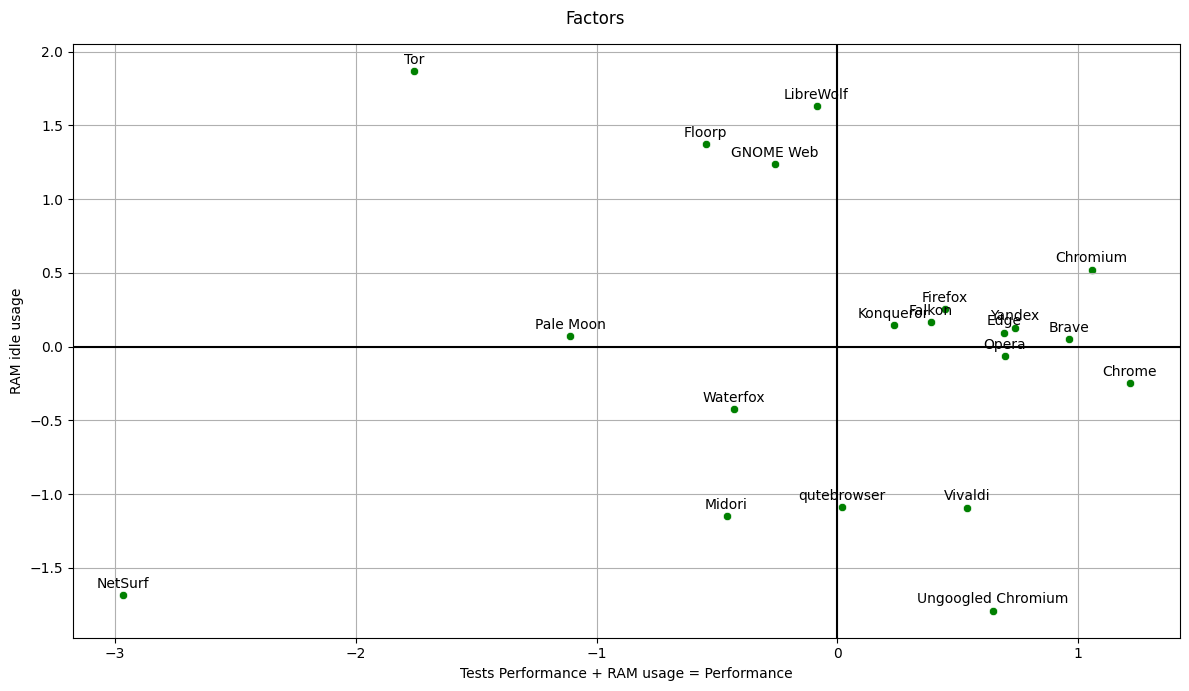

In [38]:
plt.figure(figsize=(12, 7))

# In order of better graphical understanding,
# the factors were multiplied by (-1) so that
# the abscissa and ordinate axis reflect an
# increase or decrase pair to the dataset values 
positive_factors = pca_analysis.factors.copy() * -1

plt.suptitle('Factors')
sns.scatterplot(positive_factors, x=0, y=1, color='green')
plt.xlabel('Tests Performance + RAM usage = Performance')
plt.ylabel('RAM idle usage')
plt.axhline(color='black')
plt.axvline(color='black')
plt.grid()

for sample in positive_factors.index:
    x, y = positive_factors.loc[sample].values
    y += .05
    plt.text(x, y, sample, va='baseline', ha='center',
             wrap=True, snap=True, clip_on=True)

plt.tight_layout()

With this graph the relationship between browsers and indicators can be seen much clearly, same for browser competition. After diagnosing the relations present in the dataset comes the actual performance evaluation